In [1]:
from Landscapes import *
from Experiment import Make_Lon
import numpy as np
import re


In [58]:
###NOT the full number of sims
N = 10
#If N=10, 2*2^N=2024
Num_Sims = 2**9
#Num_Sims = 20


Maximas_Reached = []
Actual_Maximas = []
for K in range(10):
    My_Land = make_NK_land(N, K)
    for sim in range(Num_Sims):
        if sim % 50 ==1:
            print(sim)
        Position = str((Position_rand(N)))
        Position = re.sub("[^0-9]", "", Position)
        Current_Climb= Hill_Climb_First(Position,My_Land, 1)
        Maximas_Reached.append(Current_Climb)
    Actual_Maximas.append(Local_Maxima_Locations(My_Land).Location)

    

1
51
101
151
201
251
301
351
401
451
501
1
51
101
151
201
251
301
351
401
451
501
1
51
101
151
201
251
301
351
401
451
501
1
51
101
151
201
251
301
351
401
451
501
1
51
101
151
201
251
301
351
401
451
501
1
51
101
151
201
251
301
351
401
451
501
1
51
101
151
201
251
301
351
401
451
501
1
51
101
151
201
251
301
351
401
451
501
1
51
101
151
201
251
301
351
401
451
501
1
51
101
151
201
251
301
351
401
451
501


In [63]:
from scipy.stats import entropy

def get_entropy(list_Data_Maximas):
    if len(list_Data_Maximas)==10:
        df = pd.DataFrame(list_Data_Maximas)
    else:
        #reshape to appropriate array
        df = pd.DataFrame(np.array(list_Data_Maximas).reshape(10,-1))
    print(len(df))
    df=df.T
    results=[]    #print(entropy(counts))

    for c in df.columns:
        #print "---- %s ---" % c
        results.append(entropy(df[c].value_counts()))
    return(results)



10


[0.0,
 1.8086349508538666,
 0.8688230931887023,
 1.9852020673678892,
 2.4648018338231426,
 2.873874873483194,
 3.1658782259651286,
 3.2471147876116127,
 3.1757714450817547,
 3.732358313605621]

10
10


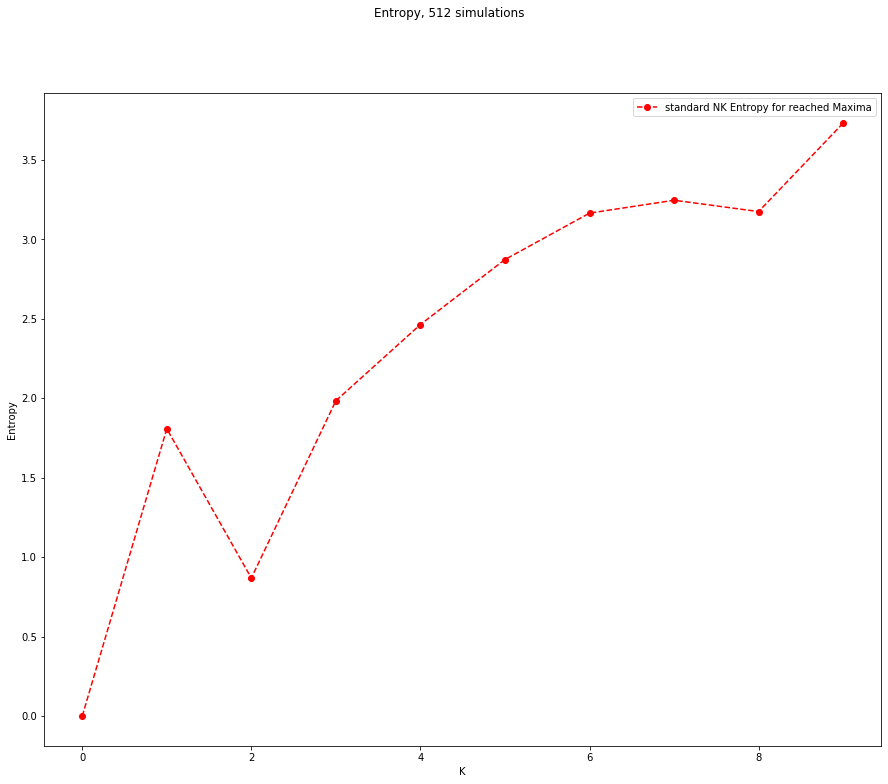

In [94]:

Reached_Maxima_NK_Entropy =np.array(Maximas_Reached)
get_entropy(Reached_Maxima_NK_Entropy)
##plot the data
fig, (ax1) = plt.subplots(1)
fig.suptitle("Entropy, 512 simulations")

ax1.plot(get_entropy(Reached_Maxima_NK_Entropy),'r--o',label='standard NK Entropy for reached Maxima')
ax1.set_ylabel('Entropy')


ax1.legend()

plt.xlabel('K')


fig.set_figheight(12)
fig.set_figwidth(15)

plt.xlabel('K')
plt.show()
fig.savefig('Standard_NK_Entropy.png')


In [59]:
## Do for Dot space



In [60]:
import numpy as np
from scipy import stats
import itertools
import matplotlib.pyplot as plt
from Landscapes import *
import pandas as pd

In [61]:
def create_dotSpace(N=10,hypers=[1,1,1,1,1,1,1,1,1,1],masked=False, mask=None):
    our_dirichlet = stats.dirichlet(hypers)    
    all_permutations = list(itertools.product([0,1],repeat = N))
    fitnesses = []
    perms = []
    transformed_locs = []
    for perm in all_permutations:
        fitnesses.append(np.dot(perm,our_dirichlet.rvs()[0]))
        if masked:
            if mask:
                perm = transform(perm,mask)
            else:
                perm = transform(perm)
        perms.append("".join([str(i) for i in perm]))
        transformed_locs.append(perm)
    frame = {"Fitness":pd.Series(fitnesses,index=perms), "Location":pd.Series(transformed_locs,index=perms)}
    return pd.DataFrame(frame)

def transform(location, mask=[1,0,1,0,0,0,1,1,1,0]):
    assert len(location) == len(mask), "The mask needs to be same length as the location"
    
    return [abs(i-1) if j==1 else i for i,j in zip(location, mask)]



    

In [ ]:
###NOT the full number of sims
N = 10
#If N=10, 2*2^N=2024
Num_Sims = 2**9
#Num_Sims = 20


Maximas_Reached_Dot_Space = []
Actual_Maximas_Dot_Space  = []
for K in range(10):
    Hypers =[K,K,K,K,K,K,K,K,K,K]
    My_Land = create_dotSpace(N,Hypers)
    for sim in range(Num_Sims):
        if sim % 50 ==1:
            print(sim)
        Position = str((Position_rand(N)))
        Position = re.sub("[^0-9]", "", Position)
        Current_Climb= Hill_Climb_First(Position,My_Land, 1)
        Maximas_Reached_Dot_Space.append(Current_Climb)
    Actual_Maximas_Dot_Space.append(Local_Maxima_Locations(My_Land).Location)

    